## Predicting house sale price for Boulder County, Colorado - Modeling

### Introduction: <br>
I would like to help all market participants make better and more informed decisions when participating in Boulder County residential real estate market. 
Some important questions are: 
<dd>1. What property features are important in contributing to sales price
<dd>2. What neighbourhoods are popular and add additional value and which don’t
<dd>3. See the distribution of the properties for each area <br>
    
It can help all market participants, either people looking to enter the market and make a choice that fits their needs and budget or for people in the market to optimize their real estate asset management. 


### Feature description

The feature engineering step has already been performed in Exploratory Data Analysis section. 
Here are our numeric features: 
1. 'Eff Yr Built' - year house was built in
2. 'Above Grd SF' - Above ground area in square feet
3. 'Basemt Tot SF' - Total basement area in square feet
4. 'Basemt Fin SF' - Finished basement area in square feet
5. 'Garage SF' - Garage area in square feet
6. 'Est Land SF' - Land area in square feet
7. 'Unincorporated' - Binary variable 1 if the house is located in unincorporated land https://bouldercounty.gov/government/about-boulder-county/unincorporated-towns/
8. 'Quality_cat' - Categorical variable from 1 to 14 representing house quality
9. 'Garage Attached' - Binary variable 1 if garage is attached, 0 for all other options
10. 'Time Adjust Sales Price' - our target response variable <br>
The following are one hot encoded Design/Market Area variables.   <br>  
       'Design_1 Sty Townh'
       'Design_1-Sty Twnhm Condo'    
       'Design_Bi Level'
       'Design_Det 1 Sty Condo'      
       'Design_Det Mult Sty Condo'
       'Design_Modular'
       'Design_Multi Sty'       
       'Design_Multi Sty Condo'
       'Design_Multi Sty Townh'    
       'Design_Mutli Sty Twnhm Condo'
       'Design_Paired'
       'Design_Patio'
       'Design_Ranch'
       'Design_Split level'
       
       'Market Area_101'
       'Market Area_102'
       'Market Area_103'
       'Market Area_104',
       'Market Area_105'
       'Market Area_106'
       'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634'
       
       



### 1. Import necessary libraries and data

In [182]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn import tree, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from io import StringIO  
from IPython.display import Image  
import pydotplus


In [107]:
X = pd.read_csv('data/data_for_modeling.csv')

In [108]:
features = X.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF', 'Basemt Fin SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_1-Sty Twnhm Condo',
       'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634' ]]
Y = X['Time Adjust Sales Price']


### Model 1.  Linear regression model

It is important to build linear regression model to use both as benchmark and most interpretable and computationally light model. <br>
Question 1: Do we need to standardize the variables? <br>
Answer: No. In general, you do not need to center or standardize your data for multiple regression. Different explanatory variables are almost always on different scales (i.e., measured in different units). This is not a problem; the betas are estimated such that they convert the units of each explanatory variable into the units of the response variable appropriately. 

In [109]:
X_train_const = sm.add_constant(features)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75, random_state=123)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(X_test.columns)

(20127, 49)
(6710, 49)
Index(['const', 'Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF',
       'Basemt Fin SF', 'Garage SF', 'Est Land SF', 'Unincorporated',
       'Quality_cat', 'Garage Attached', 'Design_1 Sty Townh',
       'Design_1-Sty Twnhm Condo', 'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', '

In [117]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [118]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.775
Model:                                 OLS   Adj. R-squared:                  0.775
Method:                      Least Squares   F-statistic:                     1508.
Date:                     Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                             10:58:20   Log-Likelihood:            -2.7536e+05
No. Observations:                    20127   AIC:                         5.508e+05
Df Residuals:                        20080   BIC:                         5.512e+05
Df Model:                               46                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.808e+06   2.43e+05    -11.558      0.000   -3.28e+06   -2.33e+06
Eff Yr Built                  1626.7778    134.221     12.120      0.000    1363.694    1889.862
Above Grd SF                   180.6023      3.716     48.603      0.000     173.319     187.886
Basemt Tot SF                  -30.3720      4.042     -7.514      0.000     -38.294     -22.450
Basemt Fin SF                   98.0176      3.909     25.077      0.000      90.356     105.679
Garage SF                       43.3343      3.449     12.563      0.000      36.573      50.095
Est Land SF                      2.0815      0.126     16.512      0.000       1.834       2.329
Unincorporated                8.515e+04   9817.473      8.674      0.000    6.59e+04    1.04e+05
Quality_cat                   6.037e+04   1123.283     53.740      0.000    5.82e+04    6.26e+04
Garage Attached               -6.73e+04   4457.752    -15.097      0.000    -7.6e+04   -5.86e+04
Design_1 Sty Townh           -1.376e+05   3.35e+04     -4.111      0.000   -2.03e+05    -7.2e+04
Design_1-Sty Twnhm Condo      5.165e+04   1.72e+04      2.998      0.003    1.79e+04    8.54e+04
Design_Bi Level              -3.051e+04   2.05e+04     -1.485      0.137   -7.08e+04    9752.763
Design_Det 1 Sty Condo       -3.445e+04    9.5e+04     -0.363      0.717   -2.21e+05    1.52e+05
Design_Det Mult Sty Condo     3.113e+05   4.16e+04      7.489      0.000     2.3e+05    3.93e+05
Design_Modular               -2.094e+05   7.17e+04     -2.921      0.003    -3.5e+05   -6.89e+04
Design_Multi Sty             -1.369e+05   1.89e+04     -7.234      0.000   -1.74e+05   -9.98e+04
Design_Multi Sty Condo        5.818e+04   9018.068      6.451      0.000    4.05e+04    7.59e+04
Design_Multi Sty Townh       -1.773e+05   3.08e+04     -5.750      0.000   -2.38e+05   -1.17e+05
Design_Mutli Sty Twnhm Condo  4.574e+04   9765.552      4.684      0.000    2.66e+04    6.49e+04
Design_Paired                -1.526e+05   2.38e+04     -6.415      0.000   -1.99e+05   -1.06e+05
Design_Patio                 -1.668e+05   2.49e+04     -6.689      0.000   -2.16e+05   -1.18e+05
Design_Ranch                 -8.113e+04   1.86e+04     -4.370      0.000   -1.18e+05   -4.47e+04
Design_Split level           -5.276e+04   1.93e+04     -2.739      0.006   -9.05e+04    -1.5e+04
Market Area_101               7.412e+05   1.36e+04     54.377      0.000    7.15e+05    7.68e+05
Market Area_102               2.248e+05   1.35e+04     16.650      0.000    1.98e+05    2.51e+05
Market Area_103               5.579e+05   1.35e+04     41.176      0.000    5.31e+05    5.84e+05
Market Area_104               4.974e+04   1.69e+04      2.947      0.003    1.67e+04    8.28e+04
Market Area_105      

T-stats look good for most coefficients except Design_Bi Level, Design_Det 1 Sty Condo and Market Area_105. 
The Durbin-Watson is 2.008 and between 1.5 and 2.5, so autocorrelation is likely not a cause for concern.


In [119]:
linear_pred = results.predict(X_test)
R2 = 1 - (np.sum((y_test-linear_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, linear_pred, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

Test set R2:  0.7619847751316607
RMSE of the base model: 227399.777


In [120]:
residuals = np.asarray(y_test - results.predict(X_test))

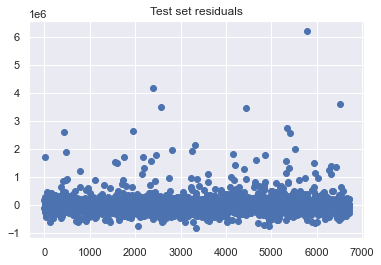

6222766.452566101


In [121]:
sns.set()
plt.plot(residuals, 'bo')
plt.title('Test set residuals')
plt.show()
print(max(residuals))


Now let's look at the residual's qqplot. 

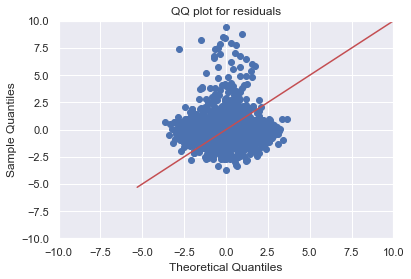

In [122]:
residuals.shape
reshaped =np.reshape(residuals, (-1, 1))
scaler = StandardScaler()
scaler.fit(reshaped)
stand_resid =scaler.transform(reshaped)
fig = sm.qqplot(stand_resid, line='45')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("QQ plot for residuals")
plt.show()

Residuals do not seem to be normally distributed. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


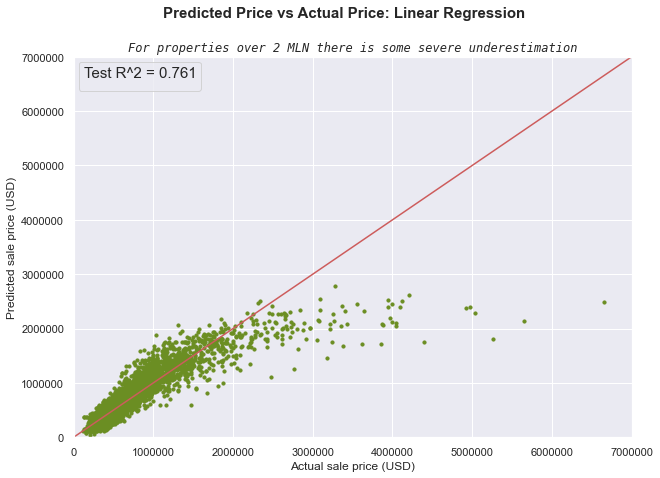

In [124]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, results.predict(X_test),s=10, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression', fontsize=15,fontweight='bold')
plt.title("For properties over 2 MLN there is some severe underestimation",style='italic',family='monospace')

plt.legend(title='Test R^2 = 0.761', title_fontsize = 15) 
plt.show()

Clearly, there is a problem. The more expensive properties are not properly priced under linear regression model, howewer for properties under 1.5 million USD the fit is great. 


### Additional feature engineering: Principal Component Analysis <br>
We perform exploratory PCA to see if the features could be combined in Principal Components which represent significant proportion of the variation.

In [125]:
#remove the constant for sm linear regression
X_test = X_test.iloc[:, 1:]
X_train = X_train.iloc[:, 1:]

First, we choose large number of principal components (15) to see what the relationship is between them and if there are any drops in variation. 

In [127]:
scaling = StandardScaler()
scaling.fit(X_train)
Scaled_data = scaling.transform(X_train)

principal = PCA(n_components = 15)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

In [128]:
principal.explained_variance_ratio_

array([0.08598114, 0.04879937, 0.04539858, 0.03903907, 0.03215844,
       0.02920786, 0.02776805, 0.02730066, 0.02511617, 0.02377222,
       0.02344396, 0.02325702, 0.02314606, 0.02258126, 0.0219427 ])

In [129]:
cumulative = np.cumsum(principal.explained_variance_ratio_)

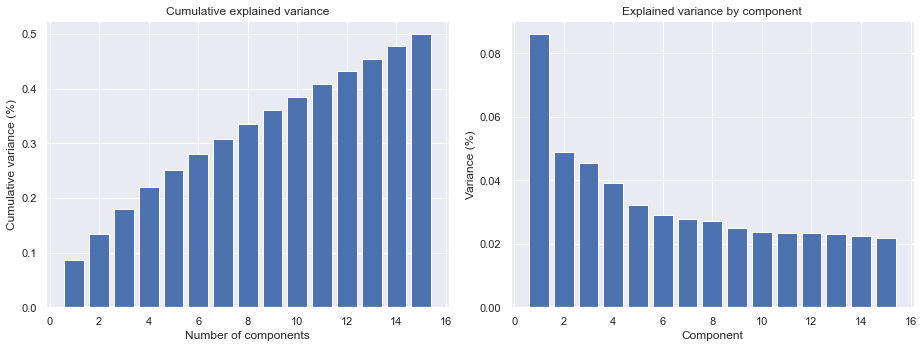

In [130]:
fig.suptitle('Principal component analysis')

plt.subplots(figsize=(13, 5))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.bar(range(1,16), cumulative )
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).bar(range(1,16), principal.explained_variance_ratio_ )
plt.title('Explained variance by component')
plt.xlabel('Component')
plt.ylabel('Variance (%)')

plt.tight_layout()

In [131]:
#Check the values of eigen vectors

principal.components_[0]

array([ 0.26594021,  0.41969169,  0.3898354 ,  0.24569586,  0.0268607 ,
        0.15913798,  0.01619563,  0.33771114,  0.29063055, -0.02206371,
       -0.05991502, -0.02471681, -0.00656012, -0.01210541, -0.00778357,
        0.32703711, -0.13102782, -0.08661658, -0.10053565,  0.02198779,
        0.0109581 , -0.01870655, -0.02045034,  0.00757917,  0.064383  ,
        0.04877666, -0.02936502,  0.00277247, -0.00158748, -0.0099808 ,
       -0.05967773, -0.03257234,  0.04949419,  0.08744337,  0.03485318,
        0.13907842,  0.08302777, -0.03947822,  0.08267018, -0.07090094,
        0.13507536,  0.03923236, -0.05086211,  0.0710037 , -0.21980619,
       -0.13020106, -0.1089621 , -0.01536359])

Text(0.5, 1.0, 'First two principal components')

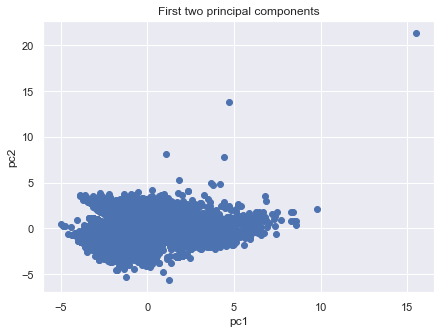

In [137]:
plt.figure(figsize=(7,5))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("First two principal components")

Text(0.5, 0.92, 'First 3 principal components')

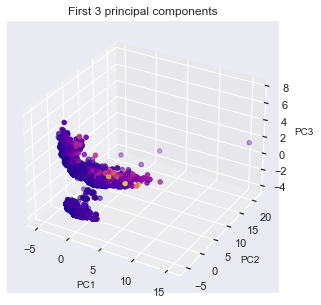

In [139]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y_train, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.title("First 3 principal components")

In [140]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.08598114 0.04879937 0.04539858 0.03903907 0.03215844 0.02920786
 0.02776805 0.02730066 0.02511617 0.02377222 0.02344396 0.02325702
 0.02314606 0.02258126 0.0219427 ]


Well, it looks like first 3,5 or 10 components don't explain much of the variance, certainly not around 80% level. I would not use them in this case and instead use original features. The loss in variance explained and interpretability is too high compared to the risk of overfitting. 

### Model 2. Decision tree 
Entropy model - no max_depth

In [163]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeRegressor()
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred =pd.Series(y_pred)
entr_model

DecisionTreeRegressor()

In [164]:
#tree.plot_tree(entr_model)

In [165]:
R2 = 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE : {rmse:.3f}")


Test set R2:  0.6892131246604251
RMSE : 186593.026


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


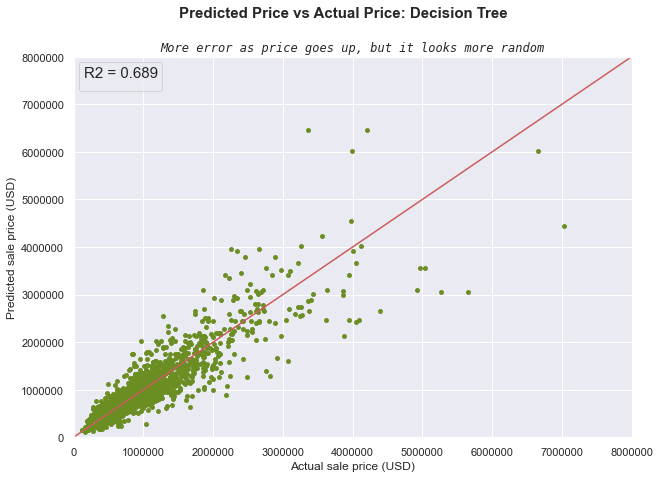

In [172]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'indianred')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, y_pred, s=15,color='olivedrab')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted Price vs Actual Price: Decision Tree', fontsize=15,fontweight='bold')
plt.title("More error as price goes up, but it looks more random",style='italic',family='monospace')


plt.legend(title='R2 = 0.689', title_fontsize = 15) 

plt.show()

R squared 0f 0.689 vs 0.761 for linear regression - not an improvement. However, it does look like the model mistreats everyone equally. 

### Model 3. Polynomial regression

In [167]:
from sklearn.preprocessing import PolynomialFeatures  
poly = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train )

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
polynom = lin2.predict(poly.fit_transform(X_test)) 
R2 = 1 - (np.sum((y_test-polynom)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ", R2)

Test set R2:  0.8722037317163234


Well it looks like polynomial regression did a great job, with R^2 at 0.872 versus 0.689 for Descision tree and 0.771 for linear regression. To check for overfitting, I would like to calculate R2 on train set to see the difference between test and train set. 

In [173]:
poly_train = lin2.predict(poly.fit_transform(X_train)) # predict on the test set
R2 = 1 - (np.sum((y_train-poly_train)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Train set R2:", R2)

Train set R2: 0.9132467054821702


Well R2 on train set is 0.913 and R2 on test set is 0.872, so there's some overfitting going on. Let's do predictions vs actuals plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


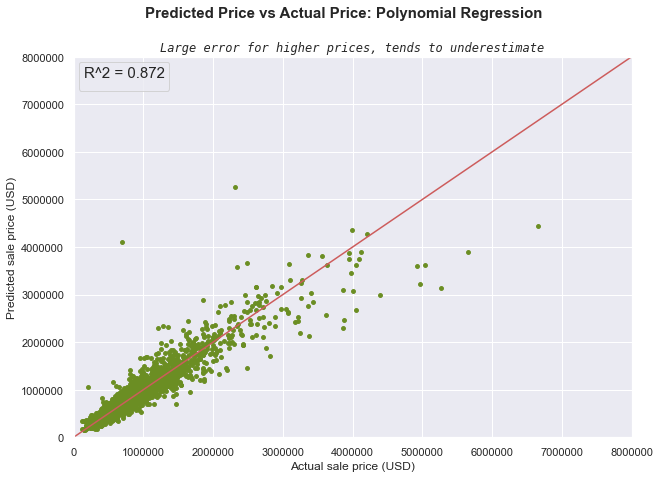

In [175]:
sns.set()
fig = plt.figure(figsize=(10, 7))

x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, polynom,s=15, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,8000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted Price vs Actual Price: Polynomial Regression', fontsize=15,fontweight='bold')
plt.title("Large error for higher prices, tends to underestimate",style='italic',family='monospace')
plt.legend(title='R^2 = 0.872', title_fontsize = 15) 
plt.show()



Well this looks much much better, however the 3 million dollars and up the relationship doesn't seem to hold up as well, but those observations are not very numerous. I would like to investigate them and see what could drive that.  

## Model 4. Multiple linear regression model with log transformed response

https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/

From page 59:

It commonly makes sense to take the logarithm of outcomes that are all-positive.

If a variable has a narrow dynamic range (that is, if the ratio between the high and low values is close to 1), then it will not make much of a difference in fit if the regression is on the logarithmic or the original scale. . . . In such a situation, it might seem to make sense to stay on the original scale for reasons of simplicity. However, the logarithmic transformation can make sense even here, because coefficients are often more easily understood on the log scale. . . . For an input with a larger amount of relative variation (for example, heights of children, or weights of animals), it would make sense to work with its logarithm immediately, both as an aid in interpretation and likely an improvement in fit too.

In [176]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)
y_test_log = transformer.transform(y_test)

In [177]:
lin2 = LinearRegression()
reg = lin2.fit(X_train, y_train_log)
log_test = reg.predict(X_test) # predict on the test set
R2 = 1 - (np.sum((y_test_log-log_test)**2)/np.sum((y_test_log-np.mean(y_test_log))**2))
print("Test set R^2: ",R2)

log_train = reg.predict(X_train) # predict on the train set
R2 = 1 - (np.sum((y_train_log-log_train)**2)/np.sum((y_train_log-np.mean(y_train_log))**2))
print("Train set R^2: ",R2)


Test set R^2:  0.8984667753964778
Train set R^2:  0.8935249887490251


In [178]:
predicted_prices =10**log_test
predicted_prices

array([ 508356.59220093,  492821.76071132,  426587.03335525, ...,
        427203.14124474, 1939576.44080183,  434919.01471465])

In [179]:
R2 = 1 - np.sum((y_test -predicted_prices)**2)/np.sum((y_test-np.mean(y_test))**2)
print("Test set R^2: ", R2)
RMSE = mean_squared_error(y_test, predicted_prices, squared=False)
print("RMSE: ", RMSE)

Test set R^2:  0.8529925471037296
RMSE:  178713.49207848578


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


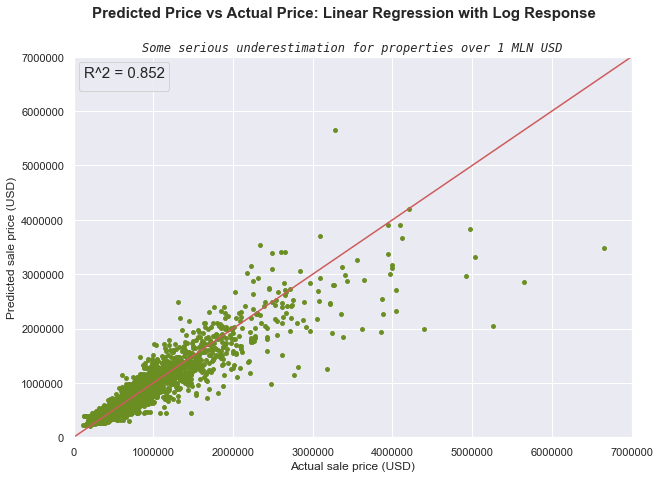

In [181]:
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, predicted_prices,s=15, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression with Log Response', fontsize=15,fontweight='bold')
plt.title("Some serious underestimation for properties over 1 MLN USD",style='italic',family='monospace')

plt.legend(title='R^2 = 0.852', title_fontsize = 15) 
plt.show()

In [183]:
#6-fold cross validation of log model
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, features, y_log, cv=kf)
print(cv_scores)
print("Mean R^2: ",np.mean(cv_scores))
print("Standard deviation R^2: ",np.std(cv_scores))
print(np.percentile(cv_scores, [2.5, 97.5]))



[0.89109375 0.89944565 0.87648998 0.89703234 0.89801589 0.89608386]
Mean R^2:  0.8930269133272208
Standard deviation R^2:  0.007838852214960092
[0.87831546 0.89926693]


### Refit the model with stats models to get the summary output

In [184]:
X_train_const = sm.add_constant(X_train)
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)

In [185]:
model = sm.OLS(y_train_log,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.894
Model:                                 OLS   Adj. R-squared:                  0.893
Method:                      Least Squares   F-statistic:                     3663.
Date:                     Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                             11:46:00   Log-Likelihood:                 25080.
No. Observations:                    20127   AIC:                        -5.007e+04
Df Residuals:                        20080   BIC:                        -4.969e+04
Df Model:                               46                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Eff Yr Built                     0.0018   4.41e-05     41.300      0.000       0.002       0.002
Above Grd SF                   7.77e-05   1.22e-06     63.573      0.000    7.53e-05    8.01e-05
Basemt Tot SF                 3.186e-06   1.33e-06      2.396      0.017     5.8e-07    5.79e-06
Basemt Fin SF                 3.088e-05   1.29e-06     24.016      0.000    2.84e-05    3.34e-05
Garage SF                     3.729e-05   1.13e-06     32.866      0.000    3.51e-05    3.95e-05
Est Land SF                   7.526e-07   4.15e-08     18.151      0.000    6.71e-07    8.34e-07
Unincorporated                   0.0410      0.003     12.700      0.000       0.035       0.047
Quality_cat                      0.0254      0.000     68.610      0.000       0.025       0.026
Garage Attached                 -0.0180      0.001    -12.291      0.000      -0.021      -0.015
Design_1 Sty Townh               1.3339      0.062     21.408      0.000       1.212       1.456
Design_1-Sty Twnhm Condo         0.0769      0.006     13.573      0.000       0.066       0.088
Design_Bi Level                  1.4058      0.061     22.954      0.000       1.286       1.526
Design_Det 1 Sty Condo           0.0408      0.031      1.306      0.192      -0.020       0.102
Design_Det Mult Sty Condo        0.1665      0.014     12.175      0.000       0.140       0.193
Design_Modular                   1.2364      0.066     18.766      0.000       1.107       1.365
Design_Multi Sty                 1.3746      0.061     22.448      0.000       1.255       1.495
Design_Multi Sty Condo           0.0591      0.003     19.911      0.000       0.053       0.065
Design_Multi Sty Townh           1.3292      0.062     21.331      0.000       1.207       1.451
Design_Mutli Sty Twnhm Condo     0.0698      0.003     21.742      0.000       0.064       0.076
Design_Paired                    1.3516      0.062     21.926      0.000       1.231       1.472
Design_Patio                     1.3747      0.061     22.430      0.000       1.255       1.495
Design_Ranch                     1.3986      0.061     22.881      0.000       1.279       1.518
Design_Split level               1.3999      0.061     22.882      0.000       1.280       1.520
Market Area_101                  0.8721      0.026     33.226      0.000       0.821       0.924
Market Area_102                  0.7084      0.027     26.655      0.000       0.656       0.761
Market Area_103                  0.8038      0.026     30.340      0.000       0.752       0.856
Market Area_104                  0.6801      0.027     25.522      0.000       0.628       0.732
Market Area_105                  0.6629      0.026     25.134      0.000       0.611       0.715
Market Area_106      

All variables are significant except Design_Det 1 Sty Condo. Durbin Watson is great.  R^2 is 0.894. <br>
However, there is an interesting thing going on with the coefficient values. 
Largest coefficients are for Market Areas ranging from 1.83 to 0.4, meaning being in a certain market area increases the value by 183% or decreases by 40%. <br>
All positive, but very small increases for year built and square footage variables.<br>
Extra 1000 SF of the house yields 7.7% increase in value.<br>
Extra 1000 SF increase in finished basement yields 3.1% in value.<br>
Extra 1000SF of garage yields 3.7% of value.<br>
Unfinished basement yields only 0.31% of the price increase.<br>
And one year of the house yields 0.2%
<br>
One level increase in quality leads to 2.5% increase in price. <br>

### Model 5. XGBoost

In [186]:
import xgboost as xgb
import pandas as pd

housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

lambdas = [1, 10, 100]
gammas =[0, 10, 100]
etas =[0, 0.2, 0.5]

params = {"objective":"reg:squarederror","max_depth":4}

rmses = []
parameters =[]

for l1 in lambdas:
    for g1 in gammas:
        for e1 in etas:
            params["reg_lambda"] = l1
            params['min_split_loss'] = g1
            params['learning_rate'] = e1
            
            cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=6, num_boost_round=15, early_stopping_rounds = 10, metrics="rmse", as_pandas=True, seed=123)

            rmses.append(cv_results["test-rmse-mean"].tail(1).values[0])

            parameters.append(params)


In [188]:
print(min(rmses))

162057.94310434084


So best rmse is 166008.08540206144 for model with 'reg_lambda': 1, 'min_split_loss': 0, 'learning_rate': 0.5. The first parameters are default values, but learning rate significantly decreases rmse. 

In [190]:
best_params={'objective': 'reg:squarederror', 'max_depth': 4, 'reg_lambda': 1, 'min_split_loss': 0, 'learning_rate': 0.5}

{}


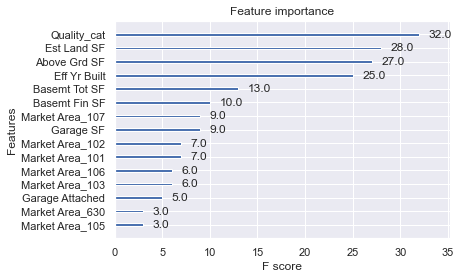

In [192]:
progress = dict()
xg_reg = xgb.train(params=best_params, dtrain=housing_dmatrix, num_boost_round=15,evals_result=progress)
print(progress)
#fig = plt.figure(figsize=(10, 30))
sns.set()
xgb.plot_importance(xg_reg,max_num_features=15)#, show_values=False, importance_type='gain'
plt.show()

In [193]:
from sklearn.metrics import mean_squared_error

dtest_reg = xgb.DMatrix(data=X_test, label=y_test)
preds = xg_reg.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 167623.580


In [195]:
R2 =1- ((167623.580)**2)*len(y_test)/ np.sum((y_test- np.mean(y_test))**2)
print('Test XGBoost R2: ', R2)

Test XGBoost R2:  0.8706713052687296


#### Fit XGBoost final model

In [206]:
# Create the DMatrix: housing_dmatrix

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

reg_params = [0.5, 0.7, 0.9]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":6}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["eta"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results = xgb.cv(dtrain=dtrain_reg, params=params, nfold=6, num_boost_round=15, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds = 10)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of eta:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["eta", "rmse"]))

Best rmse as a function of eta:
   eta           rmse
0  0.5  157534.338881
1  0.7  160686.851044
2  0.9  167841.425295


RMSE of the base model: 159571.016


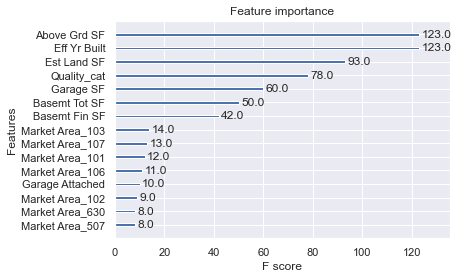

In [203]:
params = {"objective":"reg:squarederror","max_depth":6, "eta":0.5}
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=15,
)

preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(model,max_num_features=15)
plt.show()

In [204]:
R2 = 1- ((159571.016**2)*len(y_test))/ (np.sum((y_test -np.mean(y_test))**2))
print('XGBoost R2: ', R2)

XGBoost R2:  0.8827986292014688


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


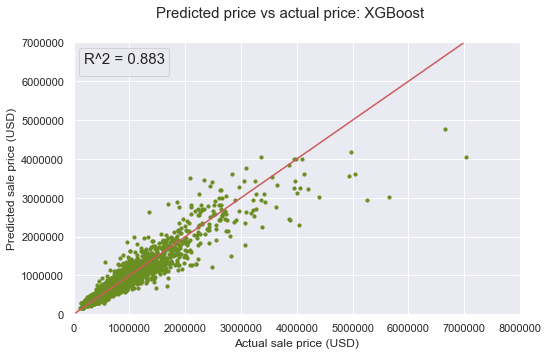

In [207]:
fig = plt.figure(figsize=(8, 5))
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted price vs actual price: XGBoost', fontsize=15)

plt.legend(title='R^2 = 0.883', title_fontsize = 15) 
plt.show()

## Random forest

In [208]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = number of trees in the forest <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

In [209]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

estimator = model.estimators_[5]
estimator
preds = model.predict(X_test)

R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ",R2)

Random Forest Test set R^2:  0.8882241389431033


In [211]:
train_preds = model.predict(X_train)
R2 = 1 - (np.sum((y_train-train_preds)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Random Forest Train set R^2: ",R2)

Random Forest Train set R^2:  0.9844330285633415


In [212]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = [1, 0.3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1, 0.3], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [213]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 0.3],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [214]:
rf_random.best_params_


{'n_estimators': 80,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 0.3,
 'max_depth': 70,
 'bootstrap': False}

n_estimators= 80,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 70,
 bootstrap= False

In [215]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    #print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 0.74%.


So, according to our hyperparameter optimization, we can gain 0.74% in accuracy improvement. I think we could use either base model or optimized model, but the selected model is much more restrictive yet yields similar performance.  Let's use selected optimal model!

### 6-fold cross validation

In [216]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = RandomForestRegressor(n_estimators= 80,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 70,
 bootstrap= False)

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print("Mean R^2: ",np.mean(cv_scores))

# Print the standard deviation
print("Standard deviation R^2: ",np.std(cv_scores))

# Print the 95% confidence interval
print(np.percentile(cv_scores, [2.5, 97.5]))

[0.90703848 0.91855301 0.88563704 0.91058991 0.90705218 0.87481363]
Mean R^2:  0.9006140407354865
Standard deviation R^2:  0.015242589324782431
[0.87616656 0.91755762]


The 95% CI for the R^2 is [0.876, 0.918], and there is some variation between the folds, which tells that algorithms is still a little sensitive to splits. 

In [217]:
final_model= RandomForestRegressor(n_estimators= 80,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 70,
 bootstrap= False)
# Train
final_model.fit(X_train, y_train)
# Extract single tree
estimator = final_model.estimators_[5]
estimator

preds = final_model.predict(X_test)
R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ", R2)

Random Forest Test set R^2:  0.8930653467899179


In [218]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 152421.734


With no splits, R^2 is at its highest level of 0.912. So when choosing an algorithms we'll account for that. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


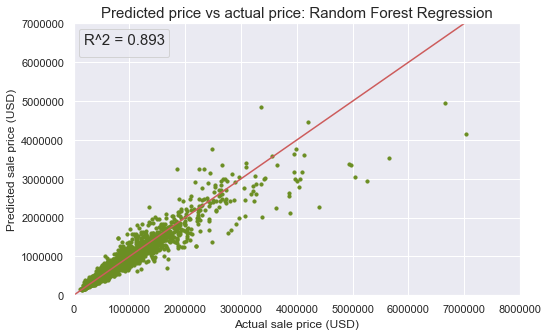

In [219]:
sns.set()

fig = plt.figure(figsize=(8, 5))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted price vs actual price: Random Forest Regression', fontsize=15)

plt.legend(title='R^2 = 0.893', title_fontsize = 15) 
plt.show()